In [6]:
import os
import ee
import geemap
from IPython.display import display, clear_output, Image
from geemap import cartoee
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [7]:
# After executing this line of code for the first use, you can get the authentication number linked to Google.
#Map = geemap.Map()
# Authenticate the Google earth engine with google account
ee.Initialize() 
Map = geemap.Map()

In [8]:
dataset = ee.ImageCollection('MODIS/MCD43A4_006_NDWI') \
            .filter(ee.Filter.date('2021-01-01', '2021-12-31')) \
            .select('NDWI') \
            .mean()

colorizedVis = {
  #'bands': ['NDWI'],
  'min': 0.0,
  'max': 1.0,
  'palette': ['FFDDAA','CCFF77','00FF99','0088A8','000088']
}

box = [-180,-88,180,88]

ndwi = dataset.visualize(**colorizedVis)

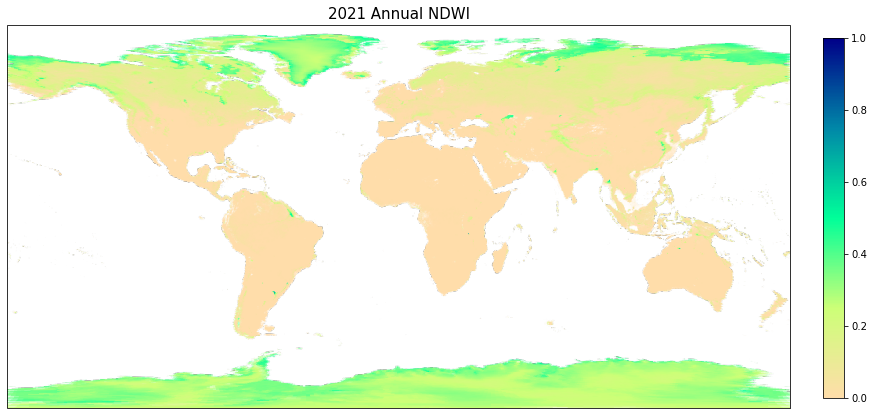

In [9]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(ndwi, region=box)
cb = cartoee.add_colorbar(ax, vis_params=colorizedVis, loc='right',label=None)

ax.set_title(label='2021 Annual NDWI', fontsize=15)

# ax.coastlines()
plt.savefig(r"C:\Users\Yang Hsiu\Desktop\plot\2021 Annual NDWI.tiff", dpi=200)